<a href="https://colab.research.google.com/github/DenisDrobyshev/university/blob/master/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B5%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82%D1%8B%D0%94%D0%BB%D1%8F%D0%97%D0%B0%D1%87%D0%B5%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Билет 1


1. Создайте массив размером 3×3 с элементами [[1, 2, 3], [4, 5, 6], [7, 8, 9]] и вычислите его определитель используя NumPy.
2. Постройте график функции $y = \sin(x) + \cos(2x)$ на интервале $[0, 2\pi]$ с помощью Matplotlib.
3. Используя SymPy, найдите производную функции $f(x) = x^3 e^x + \ln(x)$.
4. Решите систему линейных уравнений методами SciPy: $\begin{cases} 2x + 3y - z = 7 \\ x - 2y + 4z = -2 \\ 3x + y + 2z = 10 \end{cases}$
5. Загрузите CSV-файл с данными о продажах (столбцы: дата, продукт, количество, цена) в Pandas DataFrame. Выполните группировку по продуктам, рассчитайте общую выручку для каждого продукта и постройте столбчатую диаграмму результатов.

In [ ]:
import numpy as np

array_3x3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
determinant = np.linalg.det(array_3x3)
print(determinant)

from scipy.linalg import solve
from scipy.optimize import root
import pandas as pd


0.0


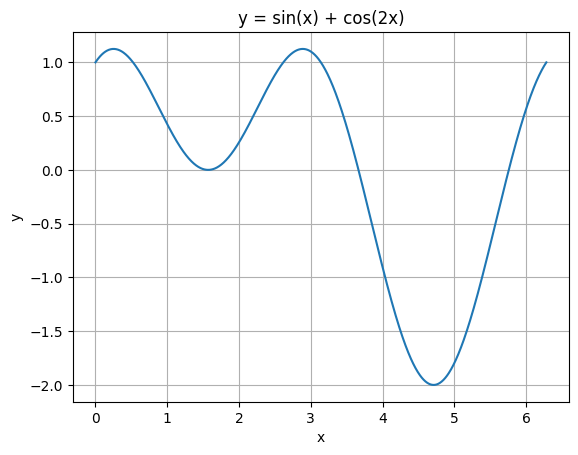

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x) + np.cos(2 * x)
plt.plot(x, y)
plt.title("y = sin(x) + cos(2x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [ ]:
from sympy import symbols, exp, ln, diff

x = symbols('x')
f = x**3 * exp(x) + ln(x)
df = diff(f, x)
display(df)

x**3*exp(x) + 3*x**2*exp(x) + 1/x

In [ ]:
from scipy.linalg import solve

A = np.array([
    [2, 3, -1],
    [1, -2, 4],
    [3, 1, 2]
])
b = np.array([7, -2, 10])
solution = solve(A, b)
print(solution)

[ 8.28571429 -4.85714286 -5.        ]


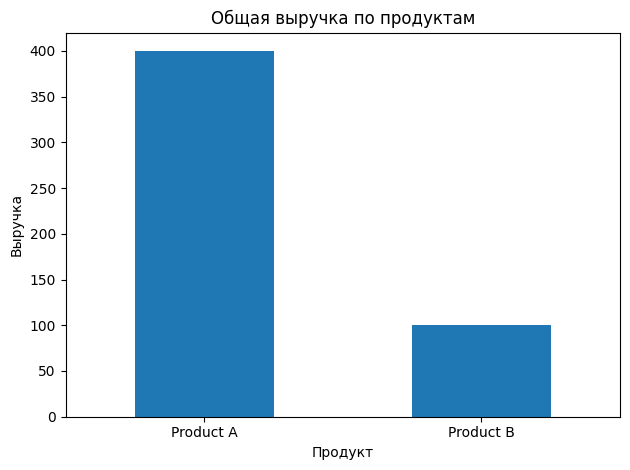

In [ ]:
df_sales = pd.read_csv("productsTable.csv")
df_sales['revenue'] = df_sales['quantity'] * df_sales['price']
revenue_by_product = df_sales.groupby('product')['revenue'].sum()
revenue_by_product.plot(kind='bar', title='Общая выручка по продуктам')
plt.xlabel("Продукт")
plt.ylabel("Выручка")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Билет 2


1. Создайте единичную матрицу 5×5 и умножьте её на вектор $[2, 4, 6, 8, 10]^T$ используя NumPy.
2. Постройте гистограмму для 1000 случайных чисел с нормальным распределением (μ=0, σ=2) в Matplotlib.
3. Вычислите определённый интеграл $\int_0^{\pi} x \sin(x) dx$ с помощью SciPy.
4. Используя SymPy, разложите функцию $f(x) = e^{\sin(x)}$ в ряд Тейлора до 5-го члена в точке $x_0 = 0$.
5. Реализуйте метод наименьших квадратов для линейной регрессии: даны точки (1,2), (2,3), (3,5), (4,4), (5,6). Найдите коэффициенты прямой $y = ax + b$ используя NumPy и визуализируйте результат.

In [ ]:
import numpy as np

I = np.eye(5)
v = np.array([2, 4, 6, 8, 10])
result = I @ v
print(result)

[ 2.  4.  6.  8. 10.]


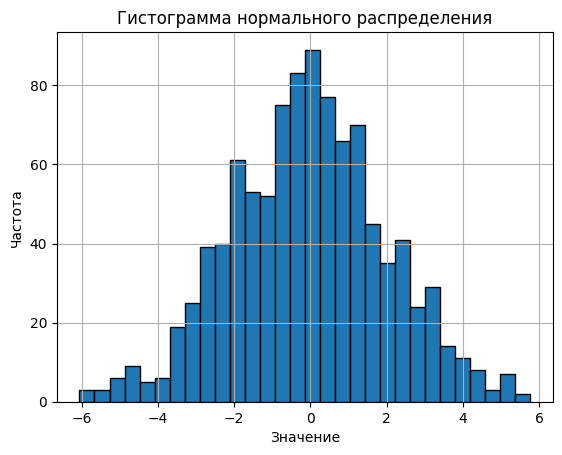

In [ ]:
import matplotlib.pyplot as plt

data = np.random.normal(loc=0, scale=2, size=1000)
plt.hist(data, bins=30, edgecolor='black')
plt.title("Гистограмма нормального распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.grid()
plt.show()

In [ ]:
from scipy.integrate import quad

def integrand(x):
    return x * np.sin(x)
integral_value, error = quad(integrand, 0, np.pi)

print(integral_value)

3.141592653589793


In [ ]:
from sympy import symbols, exp, sin, series
x = symbols('x')
f = exp(sin(x))
taylor_series = series(f, x, 0, 5).removeO()
display(taylor_series)

-x**4/8 + x**2/2 + x + 1

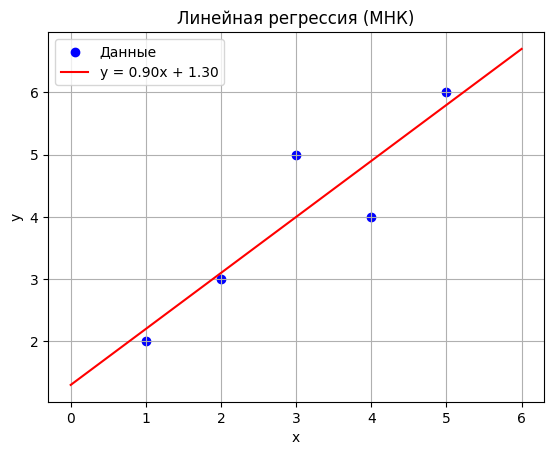

In [ ]:
points = np.array([[1, 2], [2, 3], [3, 5], [4, 4], [5, 6]])
X = points[:, 0].reshape(-1, 1)
Y = points[:, 1].reshape(-1, 1)
A = np.hstack([X, np.ones((len(X), 1))])
a, b = np.linalg.lstsq(A, Y, rcond=None)[0]

x_fit = np.linspace(0, 6, 100)
y_fit = a * x_fit + b
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Данные')
plt.plot(x_fit, y_fit, color='red', label=f'y = {a[0]:.2f}x + {b[0]:.2f}')
plt.legend()
plt.title("Линейная регрессия (МНК)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Билет 3


1. Вычислите скалярное произведение векторов $\vec{a} = [2, 3, 4]$ и $\vec{b} = [5, -1, 2]$ используя NumPy.
2. Постройте круговую диаграмму для данных [30, 25, 20, 15, 10] с подписями "A", "B", "C", "D", "E" используя Matplotlib.
3. Решите уравнение $x^3 - 6x^2 + 11x - 6 = 0$ с помощью SymPy.
4. Выполните кубическую интерполяцию для точек (0, 1), (1, 2), (2, 5), (3, 10), (4, 8) используя SciPy.
5. Создайте DataFrame с данными о студентах (имя, группа, оценки по 5 предметам), рассчитайте средний балл каждого студента, найдите лучшего студента в каждой группе и визуализируйте распределение средних баллов.

In [ ]:
import numpy as np

a = np.array([2, 3, 4])
b = np.array([5, -1, 2])
dot_product = np.dot(a, b)
print(dot_product)

15


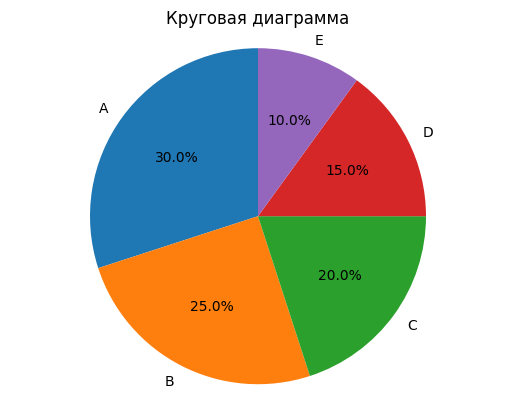

In [ ]:
import matplotlib.pyplot as plt

data = [30, 25, 20, 15, 10]
labels = ["A", "B", "C", "D", "E"]
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Круговая диаграмма")
plt.axis('equal')
plt.show()

In [ ]:
from sympy import symbols, Eq, solve

x = symbols('x')
equation = Eq(x**3 - 6*x**2 + 11*x - 6, 0)
solutions = solve(equation, x)
display(solution)

array([ 8.28571429, -4.85714286, -5.        ])

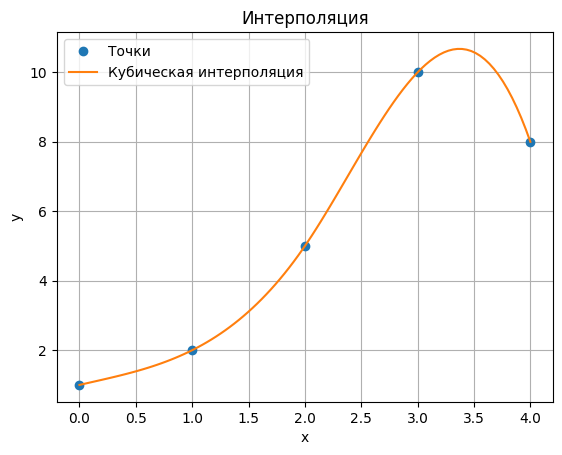

In [ ]:
from scipy.interpolate import interp1d

x_points = np.array([0, 1, 2, 3, 4])
y_points = np.array([1, 2, 5, 10, 8])
f_cubic = interp1d(x_points, y_points, kind='cubic')
x_new = np.linspace(0, 4, 100)
y_new = f_cubic(x_new)

plt.plot(x_points, y_points, 'o', label='Точки')
plt.plot(x_new, y_new, '-', label='Кубическая интерполяция')
plt.legend()
plt.title("Интерполяция")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


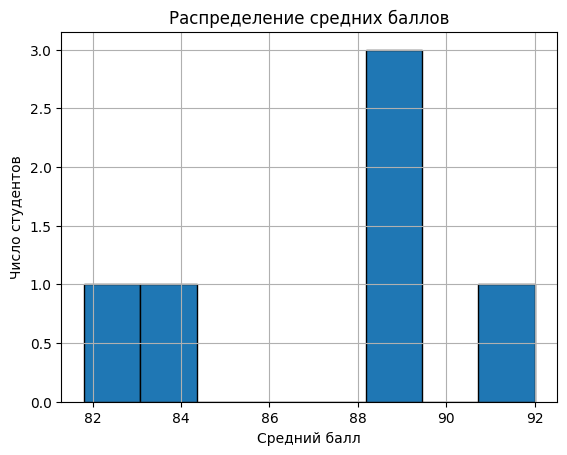

In [ ]:
import pandas as pd

students = {
    'name': ['Алексей', 'Мария', 'Дмитрий', 'Ольга', 'Иван', 'Екатерина'],
    'group': ['Группа A', 'Группа B', 'Группа A', 'Группа B', 'Группа C', 'Группа C'],
    'math': [85, 90, 78, 88, 92, 80],
    'physics': [92, 85, 80, 89, 94, 83],
    'chemistry': [88, 87, 82, 90, 91, 84],
    'english': [90, 92, 85, 87, 93, 88],
    'history': [86, 89, 84, 91, 90, 86]
}

df = pd.DataFrame(students)
df['avg_score'] = df[['math', 'physics', 'chemistry', 'english', 'history']].mean(axis=1)

best_students = df.loc[df.groupby('group')['avg_score'].idxmax()]

plt.hist(df['avg_score'], bins=8, edgecolor='black')
plt.title("Распределение средних баллов")
plt.xlabel("Средний балл")
plt.ylabel("Число студентов")
plt.grid(True)
plt.show()

## Билет 4


1. Найдите среднее, медиану и стандартное отклонение для массива [12, 15, 18, 22, 25, 30, 28, 19, 16, 21] используя NumPy.
2. Постройте столбчатую диаграмму для сравнения данных [45, 38, 52, 41, 35, 48] с подписями осей используя Matplotlib.
3. Найдите предел $\lim_{x \to 0} \frac{\sin(3x) - 3x}{x^3}$ используя SymPy.
4. Решите ОДУ первого порядка $\frac{dy}{dx} = x^2 - 2y$ с начальным условием $y(0) = 1$ на интервале [0, 5] используя SciPy.
5. Постройте 3D-поверхность функции $z = x^2 - y^2 + x y$ для $x, y \in [-3, 3]$ используя Matplotlib, найдите и отметьте точки экстремума.

In [ ]:
import numpy as np

data = np.array([12, 15, 18, 22, 25, 30, 28, 19, 16, 21])
mean_value = np.mean(data)
median_value = np.median(data)
std_dev_value = np.std(data)

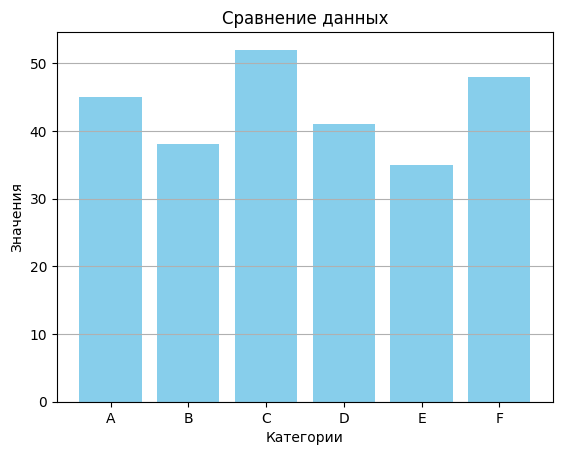

In [ ]:
import matplotlib.pyplot as plt

values = [45, 38, 52, 41, 35, 48]
labels = ['A', 'B', 'C', 'D', 'E', 'F']
plt.bar(labels, values, color='skyblue')
plt.title("Сравнение данных")
plt.xlabel("Категории")
plt.ylabel("Значения")
plt.grid(True, axis='y')
plt.show()

In [ ]:
from sympy import symbols, sin, limit, solve

x = symbols('x')
expr = (sin(3*x) - 3*x) / x**3
limit_value = limit(expr, x, 0)

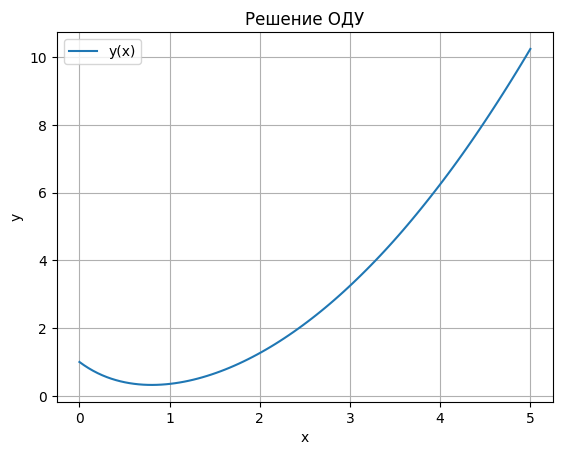

In [ ]:
from scipy.integrate import solve_ivp

def dydx(x, y):
    return x**2 - 2 * y

sol = solve_ivp(dydx, [0, 5], [1], dense_output=True)
x_eval = np.linspace(0, 5, 100)
y_sol = sol.sol(x_eval)

plt.plot(x_eval, y_sol.T, label="y(x)")
plt.title("Решение ОДУ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

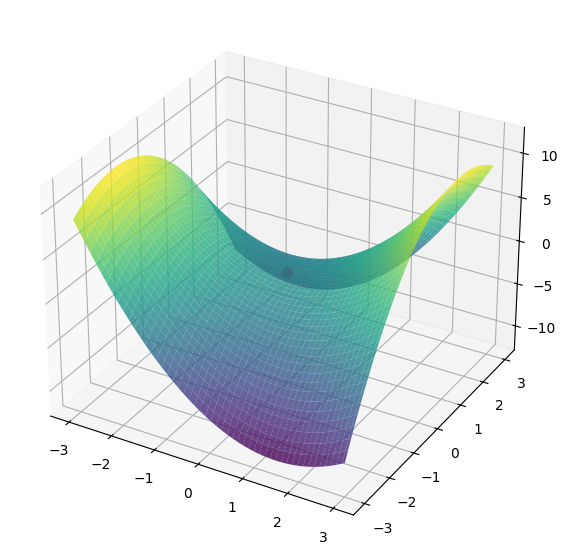

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 - Y**2 + X * Y

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

x, y = symbols('x y')
z = x**2 - y**2 + x*y
dz_dx = diff(z, x)
dz_dy = diff(z, y)
critical_point = solve((dz_dx, dz_dy), (x, y))

x_crit = critical_point[x]
y_crit = critical_point[y]
z_crit = z.subs({x: x_crit, y: y_crit})

x_crit_val = float(x_crit.evalf())
y_crit_val = float(y_crit.evalf())
z_crit_val = float(z_crit.evalf())

ax.scatter(x_crit_val, y_crit_val, z_crit_val, color='red', s=50, label='Экстремум')

## Билет 5


1. Транспонируйте матрицу $A = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{pmatrix}$ и вычислите $A^T \cdot A$ используя NumPy.
2. Постройте на одних осях графики функций $y_1 = e^{-x}$ и $y_2 = \cos(x)$ для $x \in [0, 5]$ с легендой в Matplotlib.
3. Упростите выражение $\frac{\sin^2(x) + \cos^2(x)}{\tan(x) \cdot \cot(x)}$ с помощью SymPy.
4. Вычислите двойной интеграл $\int_0^1 \int_0^x (x^2 + y^2) dy dx$ численно используя SciPy.
5. Реализуйте алгоритм k-средних для набора точек на плоскости, используя SciPy для кластеризации и Matplotlib для визуализации результатов с разными цветами кластеров.

In [ ]:
import numpy as np

A = np.array([[1, 4], [2, 5], [3, 6]])
A_transposed = A.T
result = A_transposed @ A

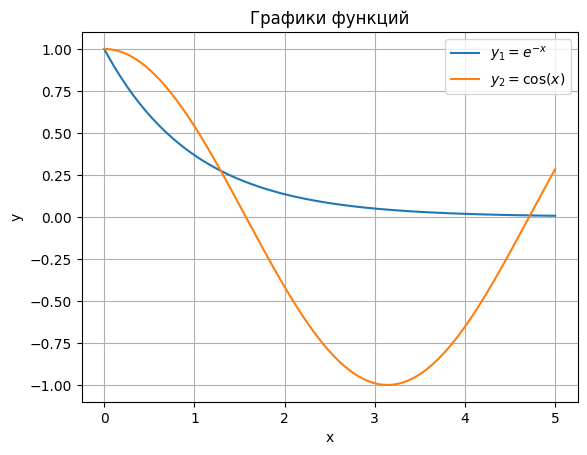

In [ ]:
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 5, 400)
y1_vals = np.exp(-x_vals)
y2_vals = np.cos(x_vals)

plt.plot(x_vals, y1_vals, label=r'$y_1 = e^{-x}$')
plt.plot(x_vals, y2_vals, label=r'$y_2 = \cos(x)$')
plt.title("Графики функций")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sympy import symbols, sin, cos, tan, cot, simplify

x = symbols('x')
expr = (sin(x)**2 + cos(x)**2) / (tan(x) * cot(x))
simplified_expr = simplify(expr)
display(simplified_expr)

1

In [ ]:
from scipy.integrate import dblquad

def integrand(y, x):
    return x**2 + y**2

integral_value, error = dblquad(integrand, 0, 1, lambda x: 0, lambda x: x)
print(integral_value)

0.3333333333333333


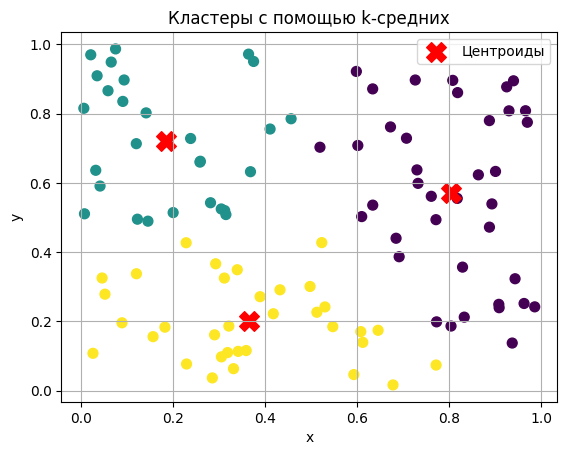

In [ ]:
from scipy.cluster.vq import kmeans, vq
np.random.seed(42)
points = np.random.rand(100, 2)

k = 3

centroids, _ = kmeans(points, k)
cluster_indices, _ = vq(points, centroids)

plt.scatter(points[:, 0], points[:, 1], c=cluster_indices, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Центроиды')
plt.title("Кластеры с помощью k-средних")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()